In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [8]:
file_path ='data_kalimantan/hasil_curah_hujan.xlsx'
df = pd.read_excel(file_path)

C:\Users\Syawal\AppData\Local\Temp\ipykernel_8036\3885803317.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_transposed.resample('M').mean()


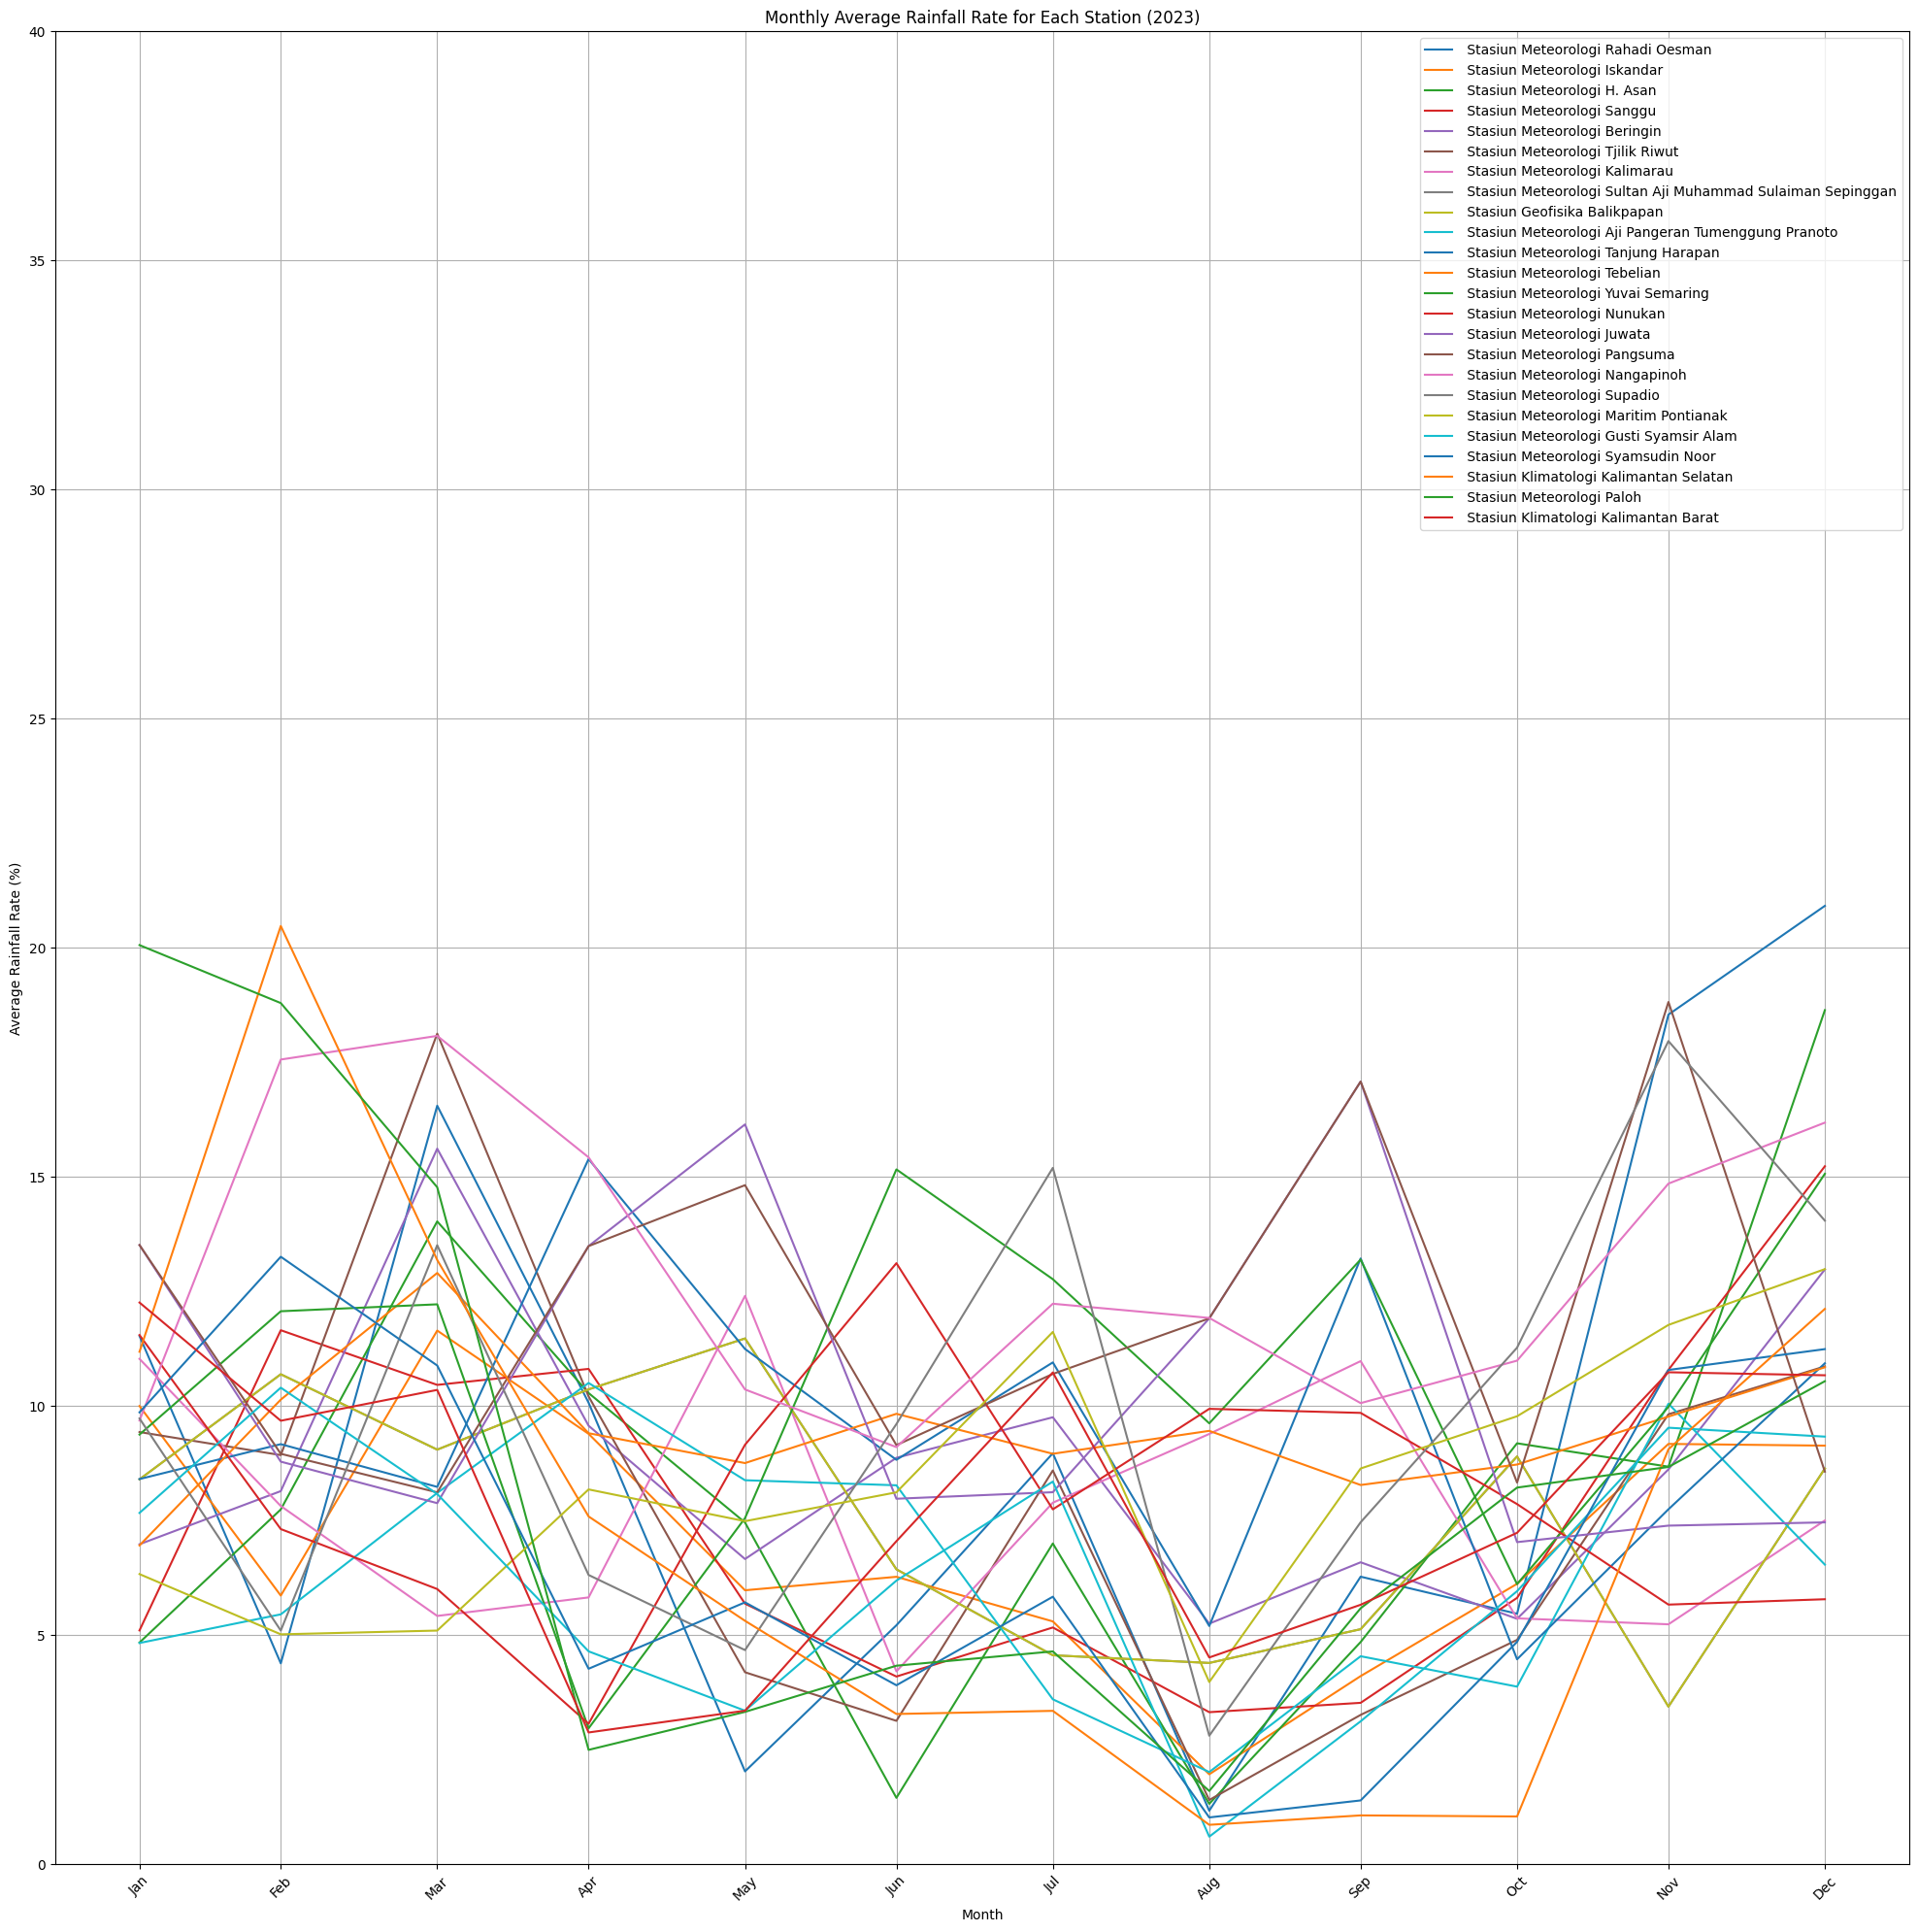

In [23]:
# Transpose the data to have dates as rows
df_transposed = df.iloc[:, 5:].T
df_transposed.columns = df['station_name']

# Convert the index (date strings) to datetime format
df_transposed.index = pd.to_datetime(df_transposed.index, format='%d-%m-%Y')

# Resample the data by month to calculate the monthly mean
monthly_avg = df_transposed.resample('M').mean()

# Plot the monthly average for each station
plt.figure(figsize=(20, 20))
for station in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[station], label=station)

plt.title('Monthly Average Rainfall Rate for Each Station (2023)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall Rate (%)')  # Change the label to Rainfall Rate
plt.legend()
plt.xticks(monthly_avg.index, monthly_avg.index.strftime('%b'), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 40)

# Show the plot
plt.show()

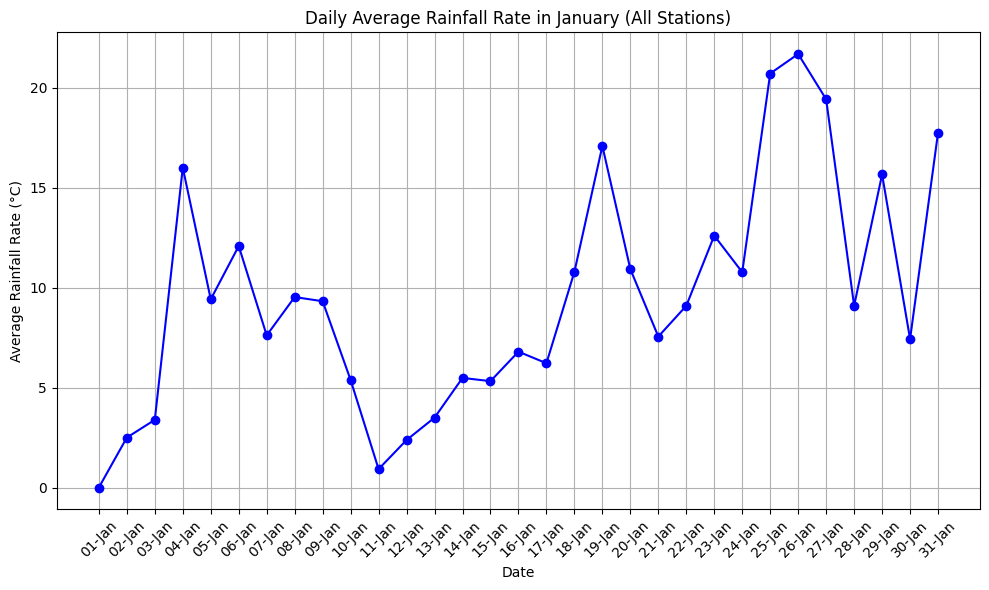

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
january_avg = daily_avg[daily_avg.index.month == 1]

# Plot the daily average for January
plt.figure(figsize=(10, 6))
plt.plot(january_avg.index, january_avg, label='Average Rainfall Rate (All Stations)', 
         marker='o', color='b')

plt.title('Daily Average Rainfall Rate in January (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate')
plt.xticks(january_avg.index, january_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


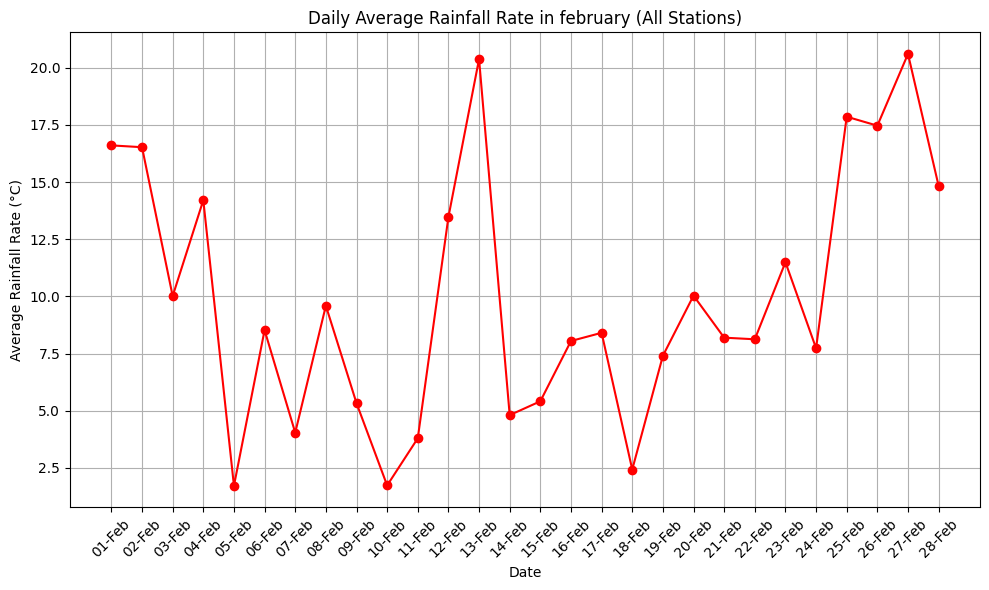

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
february_avg = daily_avg[daily_avg.index.month == 2]

# Plot the daily average for January
plt.figure(figsize=(10, 6))
plt.plot(february_avg.index, february_avg, label='Average Rainfall Rate (All Stations)', marker='o',color='r')

plt.title('Daily Average Rainfall Rate in february (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(february_avg.index, february_avg.index.strftime('%d-%b'), rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


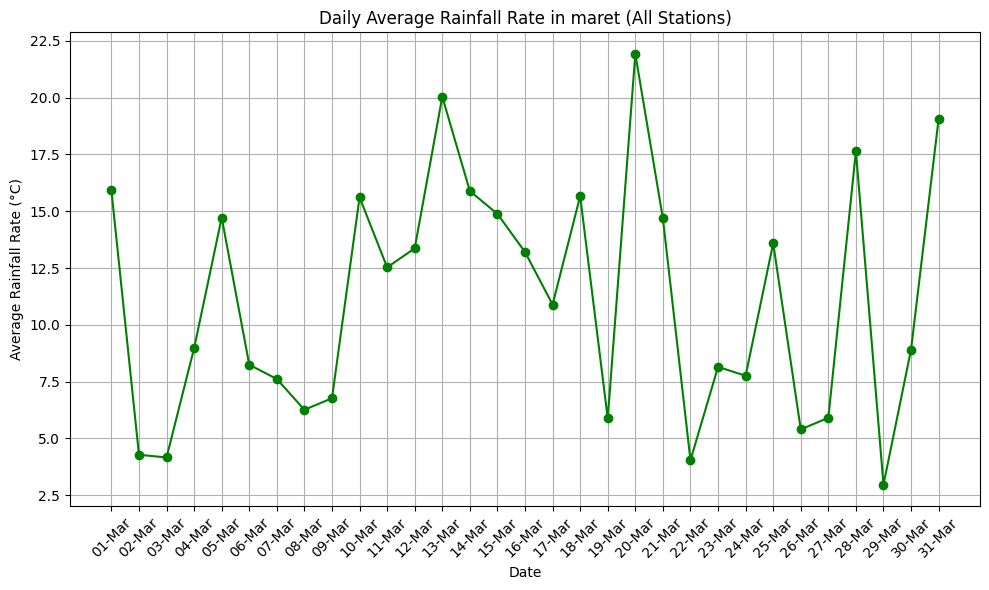

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
maret_avg = daily_avg[daily_avg.index.month == 3]

# Plot the daily average for maret
plt.figure(figsize=(10, 6))
plt.plot(maret_avg.index, maret_avg, label='Average Rainfall Rate (All Stations)', color='g', marker='o')

plt.title('Daily Average Rainfall Rate in maret (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(maret_avg.index, maret_avg.index.strftime('%d-%b'), rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


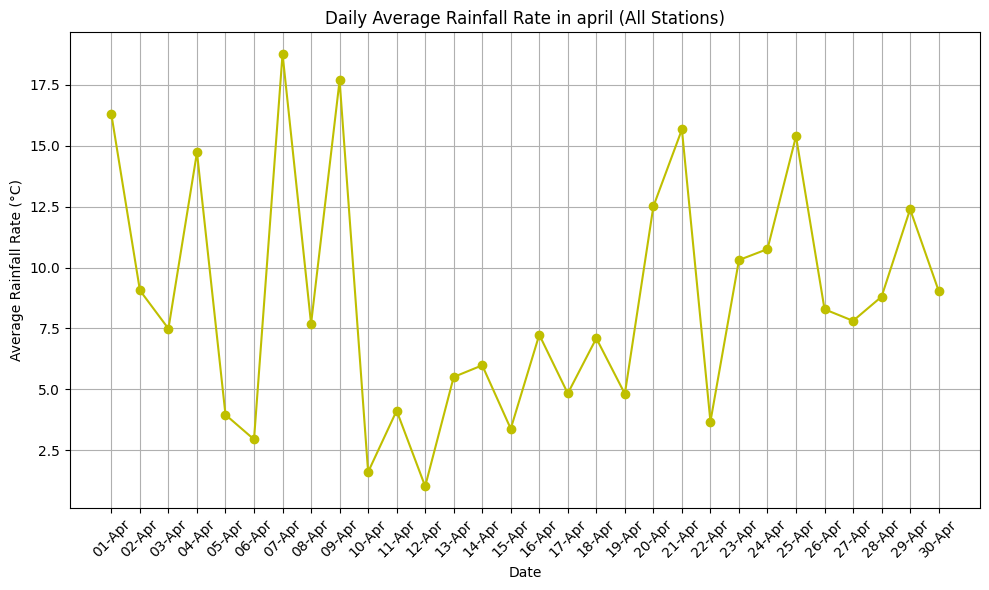

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
april_avg = daily_avg[daily_avg.index.month == 4]

# Plot the daily average for april
plt.figure(figsize=(10, 6))
plt.plot(april_avg.index, april_avg, label='Average Rainfall Rate (All Stations)', color='y', marker='o')

plt.title('Daily Average Rainfall Rate in april (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(april_avg.index, april_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


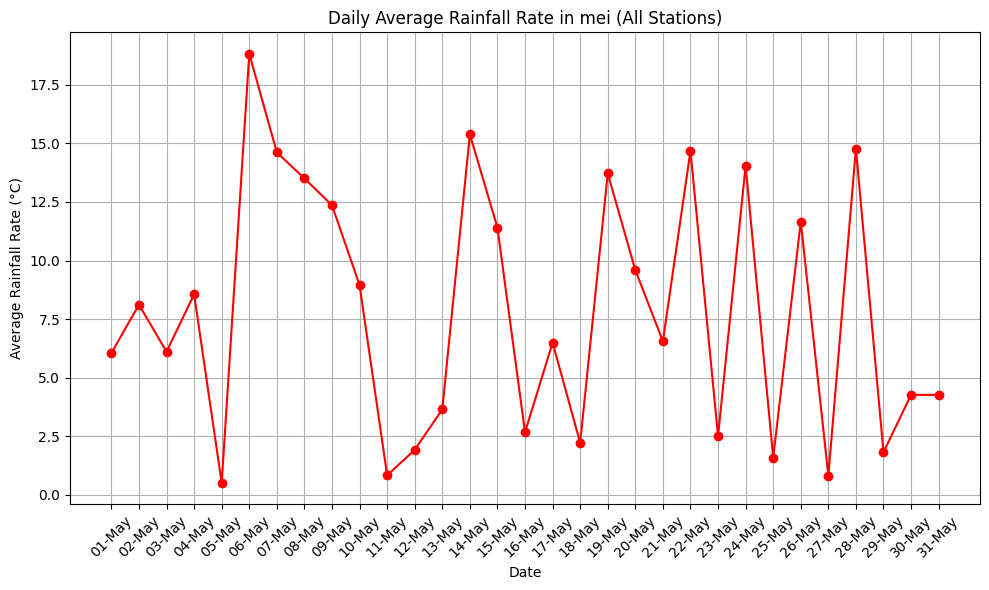

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
mei_avg = daily_avg[daily_avg.index.month == 5]

# Plot the daily average for mei
plt.figure(figsize=(10, 6))
plt.plot(mei_avg.index, mei_avg, label='Average Rainfall Rate (All Stations)', color='r', marker='o')

plt.title('Daily Average Rainfall Rate in mei (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(mei_avg.index, mei_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


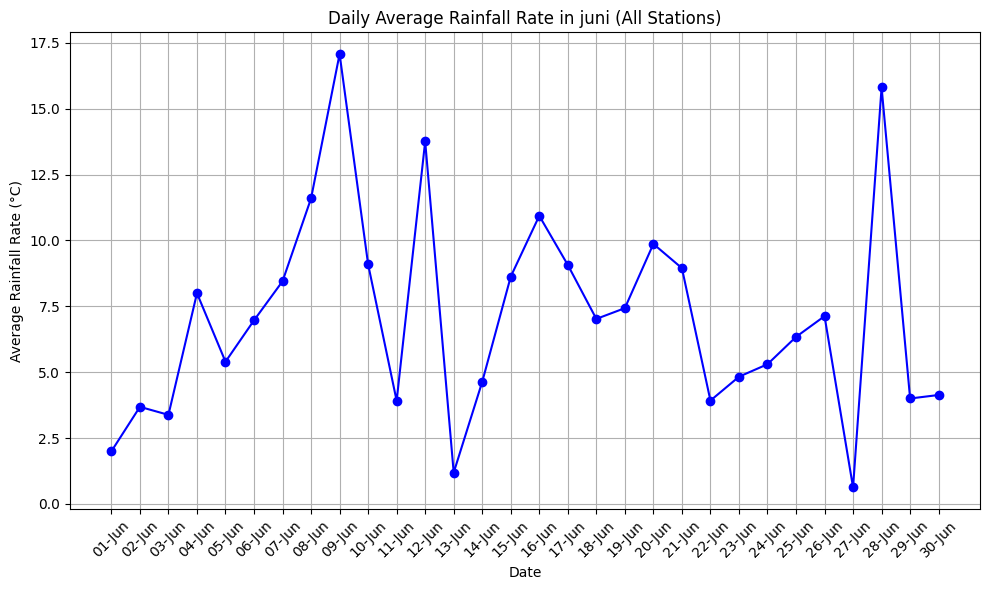

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
juni_avg = daily_avg[daily_avg.index.month == 6]

# Plot the daily average for juni
plt.figure(figsize=(10, 6))
plt.plot(juni_avg.index, juni_avg, label='Average Rainfall Rate (All Stations)', color='b', marker='o')

plt.title('Daily Average Rainfall Rate in juni (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(juni_avg.index, juni_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


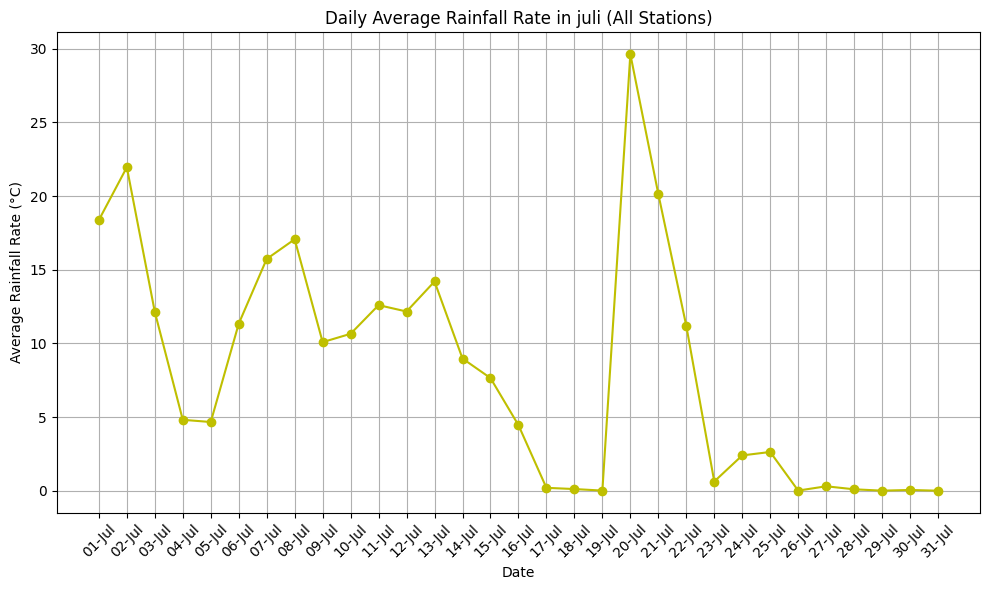

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
juli_avg = daily_avg[daily_avg.index.month == 7]

# Plot the daily average for juli
plt.figure(figsize=(10, 6))
plt.plot(juli_avg.index, juli_avg, label='Average Rainfall Rate (All Stations)', color='y', marker='o')

plt.title('Daily Average Rainfall Rate in juli (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(juli_avg.index, juli_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


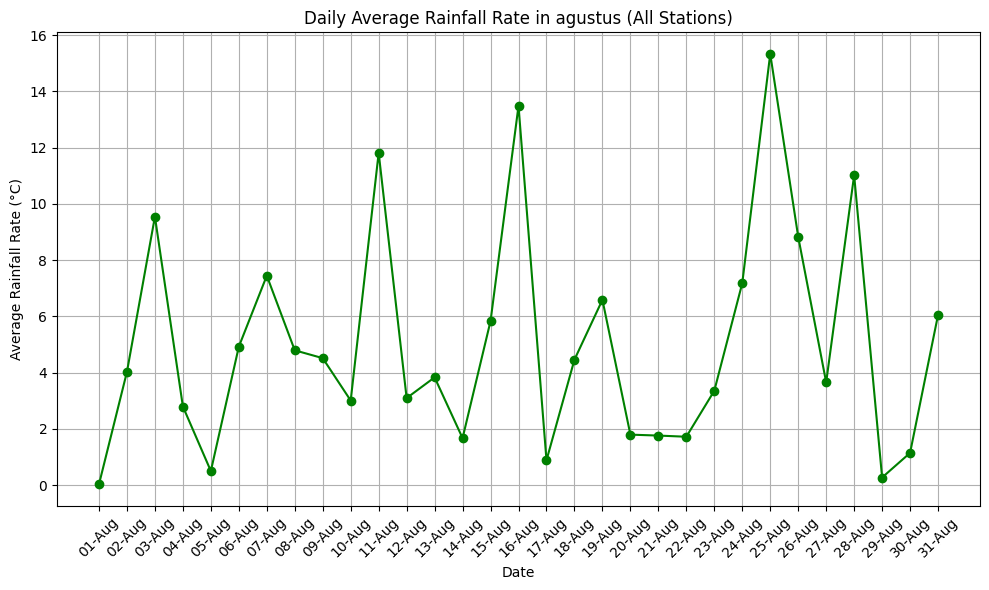

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
agustus_avg = daily_avg[daily_avg.index.month == 8]

# Plot the daily average for agustus
plt.figure(figsize=(10, 6))
plt.plot(agustus_avg.index, agustus_avg, label='Average Rainfall Rate (All Stations)', color='g', marker='o')

plt.title('Daily Average Rainfall Rate in agustus (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(agustus_avg.index, agustus_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


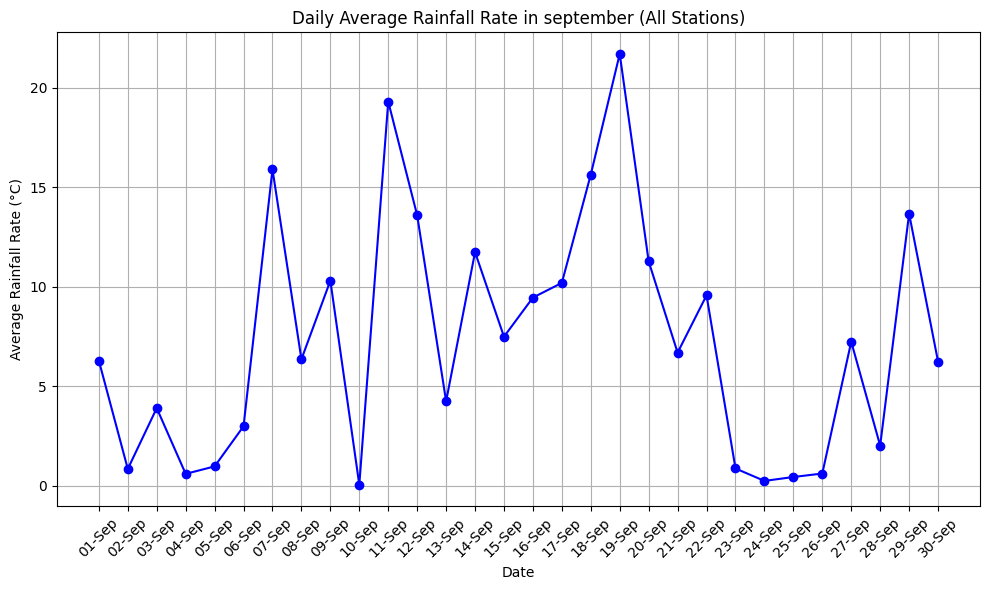

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
september_avg = daily_avg[daily_avg.index.month == 9]

# Plot the daily average for september
plt.figure(figsize=(10, 6))
plt.plot(september_avg.index, september_avg, label='Average Rainfall Rate (All Stations)', color='b', marker='o')

plt.title('Daily Average Rainfall Rate in september (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(september_avg.index, september_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


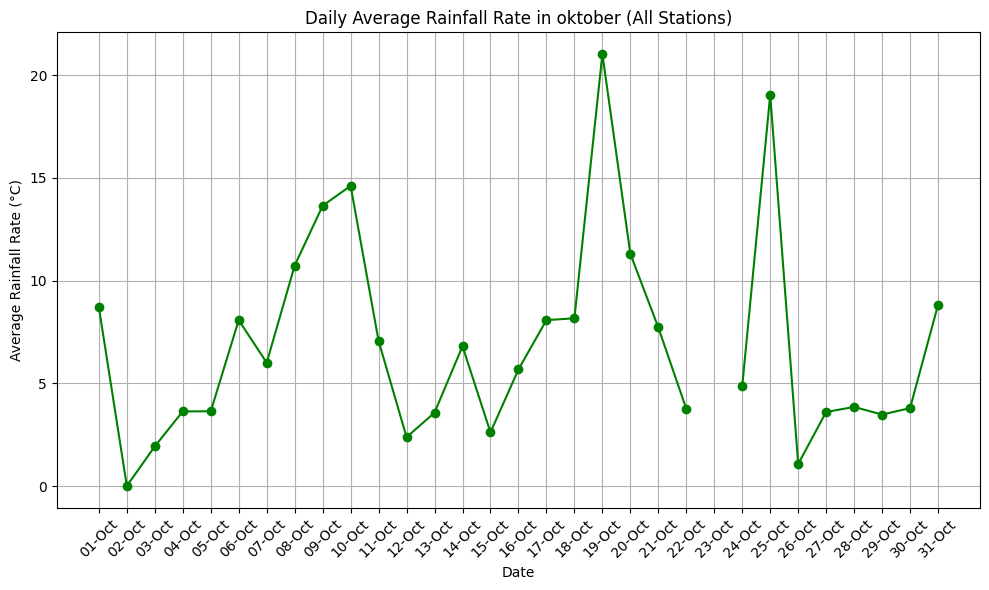

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
oktober_avg = daily_avg[daily_avg.index.month == 10]

# Plot the daily average for oktober
plt.figure(figsize=(10, 6))
plt.plot(oktober_avg.index, oktober_avg, label='Average Rainfall Rate (All Stations)', color='g', marker='o')

plt.title('Daily Average Rainfall Rate in oktober (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(oktober_avg.index, oktober_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


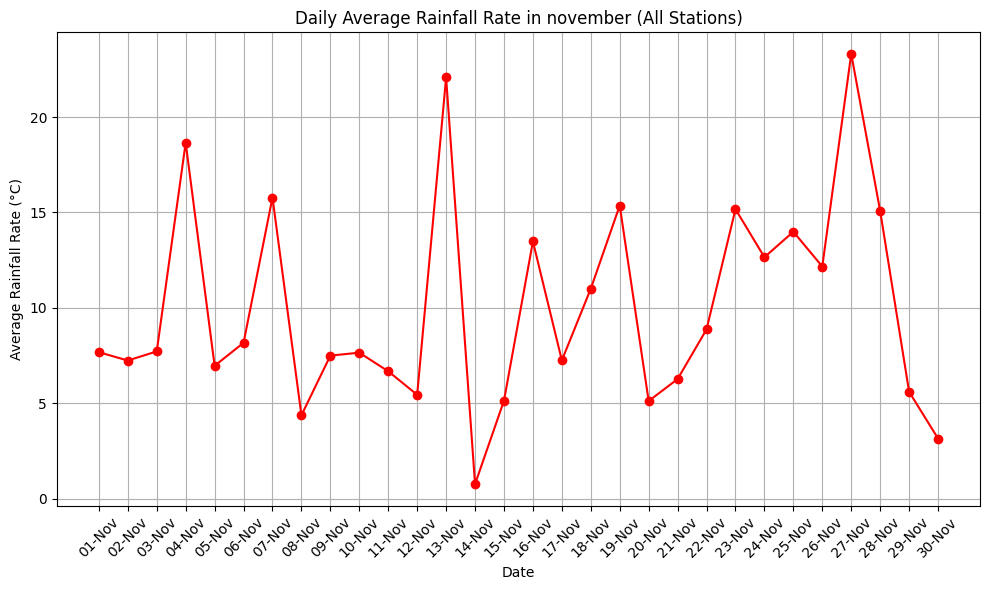

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
november_avg = daily_avg[daily_avg.index.month == 11]

# Plot the daily average for november
plt.figure(figsize=(10, 6))
plt.plot(november_avg.index, november_avg, label='Average Rainfall Rate (All Stations)', color='r', marker='o')

plt.title('Daily Average Rainfall Rate in november (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(november_avg.index, november_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


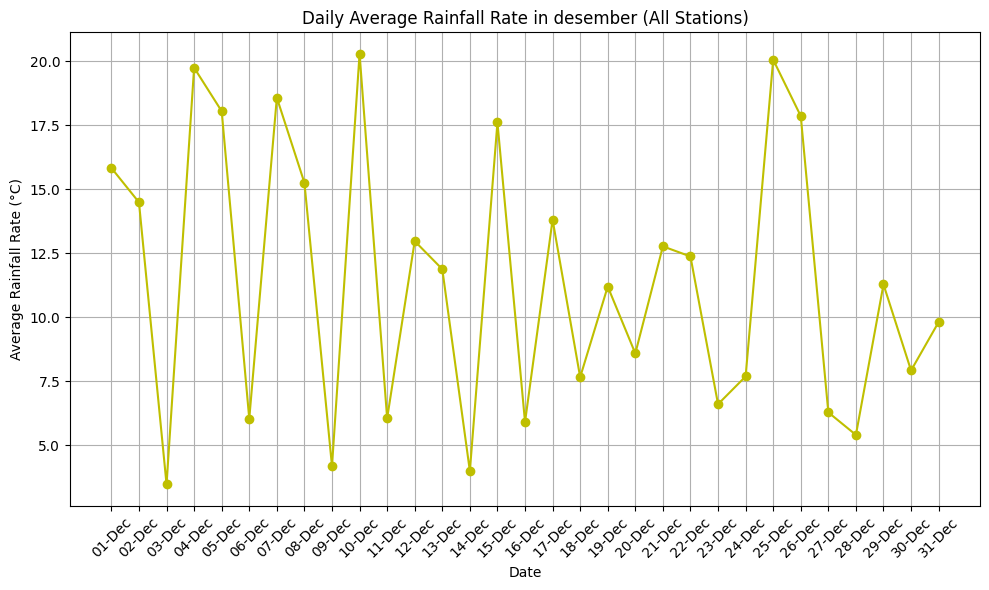

In [ ]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
desember_avg = daily_avg[daily_avg.index.month == 12]

# Plot the daily average for desember
plt.figure(figsize=(10, 6))
plt.plot(desember_avg.index, desember_avg, label='Average Rainfall Rate (All Stations)', color='y', marker='o')

plt.title('Daily Average Rainfall Rate in desember (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Rainfall Rate ')
plt.xticks(desember_avg.index, desember_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()
